In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train_df = pd.read_csv(r'C:\Users\Dell\Downloads\titanic\train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv(r'C:\Users\Dell\Downloads\titanic\test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
gender_df = pd.read_csv(r'C:\Users\Dell\Downloads\titanic\gender_submission.csv')
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Based on the difference in values for mean, median(50%), fare column seems to have some outliers... i.e 32 and 14

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Target analysis to check if the data is imbalanced or not..

Text(0, 0.5, 'Frequency of target')

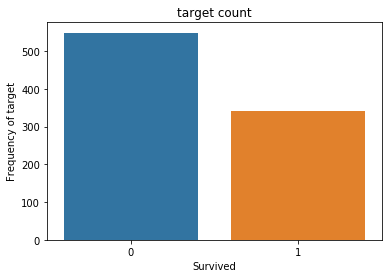

In [8]:
sns.countplot(train_df['Survived'])
plt.title('target count')
plt.xlabel('Survived')
plt.ylabel('Frequency of target')

data seems to be balanced.. (considering 5 % of total data as threshold)

#  Univariate Analysis

            - Histogram
            - missing values 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ABBD18DD68>,
      dtype=object)

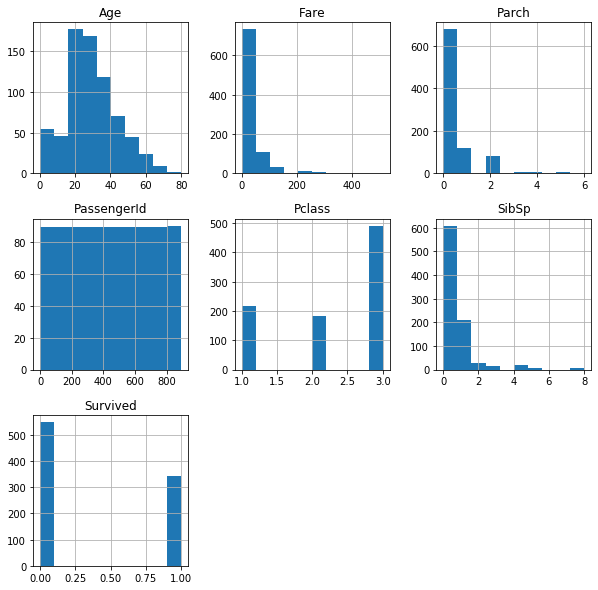

In [9]:
train_df.hist(figsize=(10,10))

In [10]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
train_df['Cabin'].shape

(891,)

Ways to handle the missing values:
        
        -drop rows\columns -
               more than 70% missing values, drop corresponding columns
               where target variable is null or absent, drop the corresponding row
               check proportion wrt target categories
        - handling
               filling(mean,median,mode,random values btn 2 std deviation)
               predicting -build a model to predict the missing values

In [12]:
train_df.isna().sum()/len(train_df)
round(train_df.isna().sum()/len(train_df)* 100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

Based on the above data, we can drop column cabin and 
Will handle Embarked and Age columns

In [13]:
train_df['Age'] = train_df.Age.fillna(np.mean(train_df['Age']))
test_df['Age'] = test_df.Age.fillna(np.mean(test_df['Age']))

In [14]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
train_df['Embarked'] = train_df['Embarked'].replace(np.nan,'S')

In [16]:
test_df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [17]:
test_df['Fare'].fillna(np.mean(test_df['Fare']), inplace = True)

In [18]:
round(train_df.isna().sum()/len(train_df)* 100,2)

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.0
dtype: float64

In [19]:
train_df.drop(['Cabin'],axis = 1, inplace = True)
test_df.drop(['Cabin'],axis = 1, inplace = True)

In [20]:
round(train_df.isna().sum()/len(train_df)* 100,2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

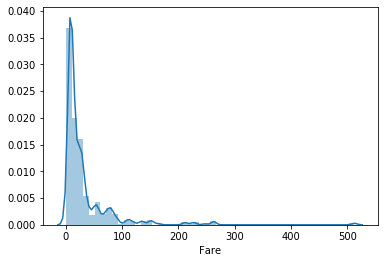

In [21]:
sns.distplot(train_df.Fare)

It is observed that the plot is +vely or rigth skewed.. Therefore, taking log will help to get normallt distributed data

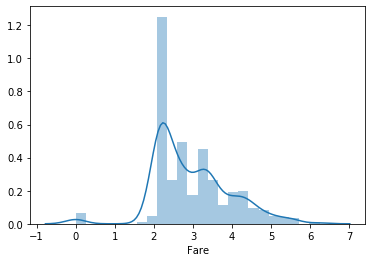

In [22]:
sns.distplot(np.log1p(train_df.Fare))  # log1p adds 1 to entire data and then takes log. taking just log instead of log1p gives error

In [23]:
test_df.Fare = np.log1p(test_df.Fare)

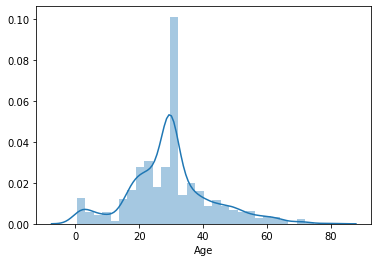

In [24]:
sns.distplot(train_df.Age)

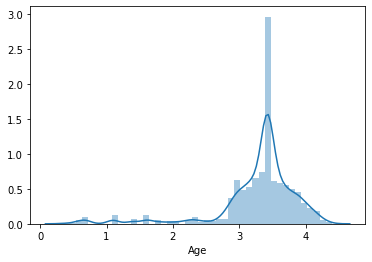

In [25]:
sns.distplot(np.log1p(train_df.Age)) 

Since plotting log1p of Age is making it negatively skewed, so do not take log 

# Encoding

In [26]:
categorical_features = train_df.select_dtypes(include = object).columns
print(categorical_features)

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


To handle the encoding, 
               drop name,ticket as it is a nominal feature not holding any information
               sex column- replace male with 1 and female with 0
               embarked - handle it

In [27]:
train_df.drop(['Name','Ticket'], axis = 1, inplace = True)
test_df.drop(['Name','Ticket'], axis = 1, inplace = True)

In [28]:
train_df.Sex = train_df.Sex.map({'male' : 1, 'female': 0})
test_df.Sex = test_df.Sex.map({'male' : 1, 'female': 0})  # this is label encoding

In [29]:
test_df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [30]:
# using pandas function get_dummies on Embarked column as part of One hot encoding
train_df = pd.get_dummies(train_df) # get_dummies works only on object data, it ignores the numeric data
test_df = pd.get_dummies(test_df)

In [31]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


In [32]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,2.178064,0,1,0
1,893,3,0,47.0,1,0,2.079442,0,0,1
2,894,2,1,62.0,0,0,2.369075,0,1,0
3,895,3,1,27.0,0,0,2.268252,0,0,1
4,896,3,0,22.0,1,1,2.586824,0,0,1


# Bivariate Analysis:
                - correlation check ( only done on numerical data)
                - pair_plot
                -scatter_plot
                - outliers handling

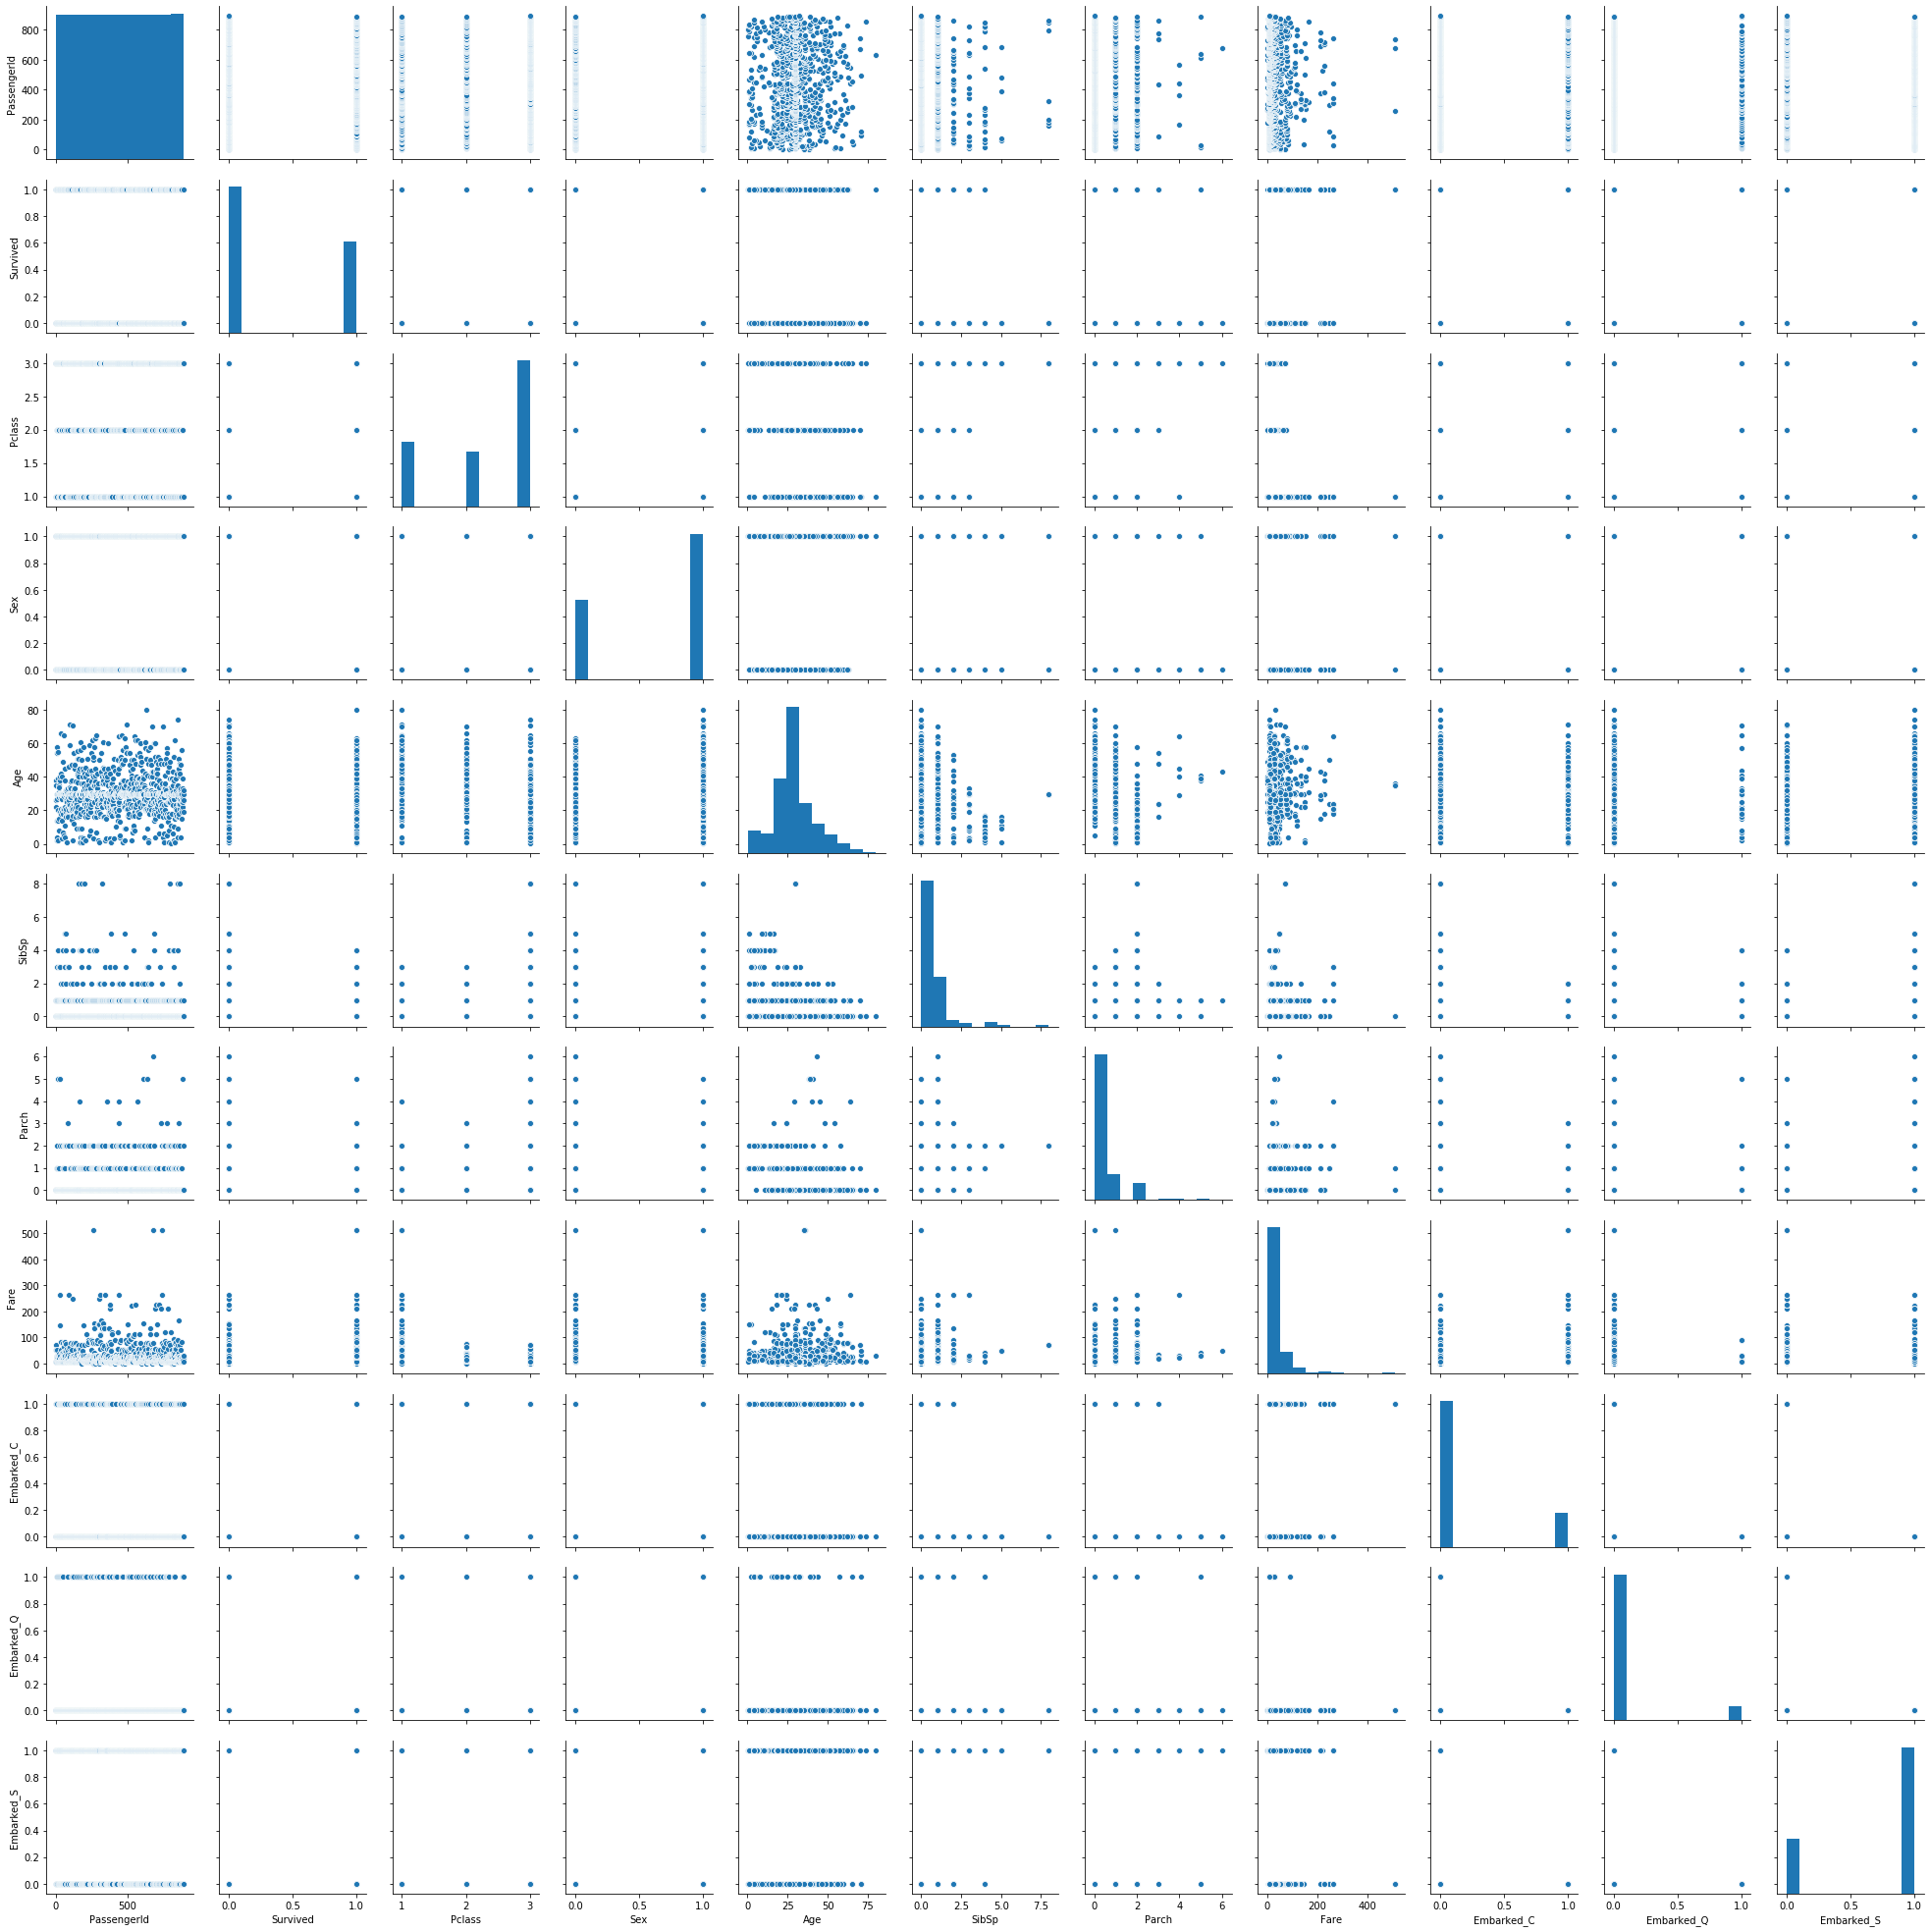

In [33]:
sns.pairplot(train_df)

From above, none of the data seems to be linearlt correlated

#  Designing the model
                 - feature scaling - this is done so that all the data/features are in the same scale.

In [70]:
from sklearn.linear_model import RidgeClassifierCV,LogisticRegressionCV,RidgeClassifier
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [35]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


In [38]:
A = pd.read_csv(r'C:\Users\Dell\Downloads\titanic\train.csv' , usecols = ['Survived']) # Had to do this as I mistakenly deleted the survived column using inplace = True
A

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [39]:
X = train_df
y = A
print(X)
print(y)

     PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch      Fare  \
0              1         0       3    1  22.000000      1      0    7.2500   
1              2         1       1    0  38.000000      1      0   71.2833   
2              3         1       3    0  26.000000      0      0    7.9250   
3              4         1       1    0  35.000000      1      0   53.1000   
4              5         0       3    1  35.000000      0      0    8.0500   
5              6         0       3    1  29.699118      0      0    8.4583   
6              7         0       1    1  54.000000      0      0   51.8625   
7              8         0       3    1   2.000000      3      1   21.0750   
8              9         1       3    0  27.000000      0      2   11.1333   
9             10         1       2    0  14.000000      1      0   30.0708   
10            11         1       3    0   4.000000      1      1   16.7000   
11            12         1       1    0  58.000000      0      0

In [45]:
X = train_df.drop(['PassengerId','Survived'], axis = 1)
y = train_df.Survived

In [46]:
X_test_ = test_df.drop(['PassengerId'],axis = 1)

In [47]:
print(X.shape)
print(X_test_.shape)

(891, 9)
(418, 9)


In [49]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [48]:
X_test_.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [50]:
scale = StandardScaler()
X_ = scale.fit_transform(X) # fit_transform on the training set
X_test_ = scale.transform(X_test) # only transform on the test set

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X_,y,test_size = 0.2,stratify = y,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 9)
(179, 9)
(712,)
(179,)


In [52]:
lr = RidgeClassifierCV()
lr = lr.fit(X_train,y_train) # training the train data

In [53]:
lr

RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]), class_weight=None, cv=None,
                  fit_intercept=True, normalize=False, scoring=None,
                  store_cv_values=False)

In [54]:
train_prediction = lr.predict(X_train)
print(train_prediction)

[0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1
 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0
 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0
 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 

In [55]:
test_prediction = lr.predict(X_test)
print(test_prediction)

[0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0]


In [56]:
# Model validation

print('Training set validation:{}'.format(roc_auc_score(y_train,train_prediction)))
print('Testing set validation:{}'.format(roc_auc_score(y_test,test_prediction)))

Training set validation:0.783311221807805
Testing set validation:0.7932806324110672


In [57]:
# Predict on the test.csv file
pred = lr.predict(X_test_)
test_df['Survived'] = pred
test_df[['PassengerId','Survived']].to_csv('Submission.csv',index = False)

In [58]:
pred.shape

(418,)

In [59]:
#### cross validation
scores = cross_val_score(RidgeClassifierCV(), X_train, y_train, cv = 5, scoring='roc_auc')
print(scores)
print(np.std(scores))
print(np.mean(scores))

[0.84039256 0.82066116 0.87355372 0.878367   0.86845466]
0.02216101063756003
0.8562858205883284


# Approaches to improve model performance:
                  ensembling,stacking
                  hyper parameter tuning
                  replace with complex algorithmns(like GBM, RF)
                  feature engineering
                  feature selection
                  repeated EDA
                  

Feature Selection

In [60]:
## model selection based on performance metric:

def train_model(model,name):
    classifier = model.fit(X_train,y_train)
    print('Training AUC:{}'.format(roc_auc_score(classifier.predict(X_train),y_train)))
    print('Validation AUC:{}'.format(roc_auc_score(classifier.predict(X_test),y_test)))

models = [LogisticRegressionCV(),RidgeClassifierCV()]
names = ['LogisticClassifier','RidgeClassifier']

for m,n in zip(models,names):
    train_model(m,n)

C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training AUC:0.7956452222948114
Validation AUC:0.8015104018238814
Training AUC:0.7929089026915114
Validation AUC:0.8117647058823529


In [64]:
## using cross validation score

def train_model(model,name):
    scores = cross_val_score(model,X_train,y_train, scoring = 'roc_auc',cv = 5)
    print('\nModel:{}'.format(name))
    print('AUC Standard deviation:', np.std(scores))
    print('Average AUC score:',np.mean(scores))

models = [LogisticRegressionCV(),RidgeClassifierCV()]
names = ['LogisticClassifier','RidgeClassifier']

for m,n in zip(models,names):
    train_model(m,n)

C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARN


Model:LogisticClassifier
AUC Standard deviation: 0.02272514149037446
Average AUC score: 0.8557089969707526

Model:RidgeClassifier
AUC Standard deviation: 0.02216101063756003
Average AUC score: 0.8562858205883284


# Hyper parameter tuning

## Various ways of tuning hyper parameters-
      - GridSearchCV()
      - RandomSearchCV
      - Bayesian optimizer

In [65]:
parameters = {'Cs':[1,10]}
lr = LogisticRegressionCV()
clf = GridSearchCV(lr, parameters,cv = 5,scoring = 'roc_auc')
clf.fit(X_train,y_train)
pd.DataFrame(clf.cv_results_).sort_values('mean_test_score', ascending = False)

C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARN

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Cs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.094946,0.020743,0.001999,5.917394e-07,10,{'Cs': 10},0.832541,0.824587,0.873347,0.880892,0.867178,0.855641,0.022745,1
0,0.027407,0.020835,0.006982,8.509380e-03,1,{'Cs': 1},0.789979,0.824587,0.835950,0.882365,0.839293,0.834354,0.029660,2


In [67]:
parameters = {'n_estimators':[10,100,200,500],'max_depth': [1,2,3,4,5,6,7,8,9,10]}
rf = RandomForestClassifier(bootstrap = True, oob_score = True,random_state = 42,min_samples_leaf = 20,max_features = 'sqrt')
clf = GridSearchCV(rf, parameters,cv = 5,scoring = 'roc_auc',n_jobs = -1)
clf.fit(X_train,y_train)
pd.DataFrame(clf.cv_results_).sort_values('mean_test_score', ascending = False)

C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.026385,0.000800,0.004997,0.001548,4,10,"{'max_depth': 4, 'n_estimators': 10}",0.845971,0.829132,0.879132,0.913089,0.876756,0.868732,0.029084,1
16,0.025185,0.001599,0.004397,0.000490,5,10,"{'max_depth': 5, 'n_estimators': 10}",0.856405,0.830888,0.878512,0.905829,0.870903,0.868448,0.024752,2
36,0.025990,0.002526,0.005597,0.001496,10,10,"{'max_depth': 10, 'n_estimators': 10}",0.841012,0.836570,0.881405,0.903620,0.871328,0.866723,0.025187,3
32,0.023386,0.002415,0.004597,0.001199,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.841012,0.836570,0.881405,0.903620,0.871328,0.866723,0.025187,3
28,0.026584,0.001496,0.004998,0.001548,8,10,"{'max_depth': 8, 'n_estimators': 10}",0.841012,0.836570,0.881405,0.903620,0.871328,0.866723,0.025187,3
20,0.028783,0.002711,0.004997,0.000632,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.841426,0.835744,0.876860,0.904251,0.870583,0.865705,0.024994,6
37,0.209480,0.010701,0.020588,0.000800,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.837603,0.842045,0.877479,0.899726,0.871967,0.865699,0.023184,7
33,0.212517,0.011549,0.019194,0.001160,9,100,"{'max_depth': 9, 'n_estimators': 100}",0.837603,0.842045,0.877479,0.899726,0.871967,0.865699,0.023184,7
29,0.222272,0.010320,0.020988,0.002448,8,100,"{'max_depth': 8, 'n_estimators': 100}",0.837397,0.841012,0.878099,0.899726,0.871967,0.865575,0.023513,9
24,0.024985,0.001672,0.005397,0.001020,7,10,"{'max_depth': 7, 'n_estimators': 10}",0.841012,0.835331,0.876756,0.903620,0.870796,0.865435,0.024981,10


In [72]:
parameters = {'alpha':np.arange(1,20,0.1)}
lr1 = RidgeClassifier()
clf = GridSearchCV(lr1, parameters,cv = 5,scoring = 'roc_auc')
clf.fit(X_train,y_train)
pd.DataFrame(clf.cv_results_).sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
189,0.002399,0.000490,0.001799,0.000400,19.9,{'alpha': 19.900000000000016},0.839979,0.821694,0.873554,0.878998,0.868242,0.856429,0.022018,1
107,0.002399,0.000490,0.001399,0.000489,11.7,{'alpha': 11.70000000000001},0.840599,0.820868,0.873554,0.878788,0.868455,0.856388,0.022171,2
103,0.002799,0.000748,0.001199,0.000399,11.3,{'alpha': 11.30000000000001},0.840599,0.820868,0.873554,0.878788,0.868455,0.856388,0.022171,2
105,0.002399,0.000490,0.001599,0.000490,11.5,{'alpha': 11.500000000000009},0.840599,0.820868,0.873554,0.878788,0.868455,0.856388,0.022171,2
106,0.002599,0.000490,0.001599,0.000490,11.6,{'alpha': 11.600000000000009},0.840599,0.820868,0.873554,0.878788,0.868455,0.856388,0.022171,2
104,0.002598,0.000800,0.001599,0.000489,11.4,{'alpha': 11.40000000000001},0.840599,0.820868,0.873554,0.878788,0.868455,0.856388,0.022171,2
184,0.003598,0.001200,0.002399,0.001020,19.4,{'alpha': 19.400000000000016},0.839979,0.821694,0.873347,0.878998,0.868242,0.856387,0.021986,7
185,0.002598,0.000800,0.001999,0.000632,19.5,{'alpha': 19.500000000000018},0.839979,0.821694,0.873347,0.878998,0.868242,0.856387,0.021986,7
182,0.002598,0.000489,0.002399,0.000490,19.2,{'alpha': 19.200000000000017},0.839979,0.821694,0.873347,0.878998,0.868242,0.856387,0.021986,7
188,0.002399,0.000490,0.001998,0.000632,19.8,{'alpha': 19.80000000000002},0.839979,0.821694,0.873347,0.878998,0.868242,0.856387,0.021986,7


In [76]:
#### cross validation
scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring='roc_auc')
print(scores)
print(np.std(scores))
print(np.mean(scores))

[0.84059917 0.82066116 0.87355372 0.87899832 0.86802895]
0.02221302502904509
0.8563682629147624
